In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### Preprocesamiento de los datos

#### Consigna 1

Leer los datos del archivo `tabla_nutricional.csv`. Completar las celdas faltantes con ceros y asegurarse de que todos los datos estén en la misma unidad.


In [3]:
#importación de datos
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

#remplazo de valores nulos por 0
tabla_nutricional.fillna(0, inplace=True)

#alimentos = tabla_nutricional['Alimento'] #guardo los alimentos
#tabla_nutricional = tabla_nutricional.drop('Alimento', axis='columns') #saco los alimentos para tener sólo números
#tabla_nutricional = tabla_nutricional.mul(100 / tabla_nutricional['Cantidad (gr/ml)'], axis=0) #obtengo todas las filas a 100 gr
#tabla_nutricional['Alimento'] = alimentos # agrego alimentos devuelta
#tabla_nutricional = tabla_nutricional[['Alimento'] + [col for col in tabla_nutricional.columns] if col != ['Alimento']] #reordeno
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000  #divido por mil las columnas con mg para obtener gr
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols = tabla_nutricional.columns # Na (mg);Ca (mg);Fe (mg);
cols_to_drop = [col for col in cols if 'mg' in col] #elimino las columnas con mg
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

tabla_nutricional_clean = tabla_nutricional
tabla_nutricional.head(10)

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,270.00,12.42,8.37,7.83,0.0,4.99,2.19,0.520,0.0,0.15390,0.28350,0.000189
1,Leche entera en polvo,11.00,4.51,2.84,2.73,0.0,1.62,0.77,0.060,0.0,0.04444,0.09900,0.000060
2,Yogurt,19.00,2.45,0.51,0.49,0.0,0.32,0.14,0.014,0.0,0.00799,0.01767,0.000005
3,Queso crema,1.66,0.06,0.10,0.37,0.0,0.36,0.11,0.010,0.0,0.00123,0.00093,0.000000
4,Queso cuartirolo,3.66,0.06,0.77,0.80,0.0,0.76,0.21,0.020,0.0,0.02084,0.01654,0.000000
5,Queso rallar,1.66,0.06,0.55,0.45,0.0,0.36,0.11,0.008,0.0,0.02042,0.01578,0.000000
6,Huevo,16.00,0.00,1.92,1.89,0.0,0.51,0.72,0.460,0.0,0.02160,0.00896,0.000400
7,Asado,50.00,0.00,9.30,7.50,0.0,2.93,3.27,0.189,0.0,0.03300,0.00750,0.001120
8,Paleta,15.00,0.00,3.00,1.50,0.0,0.88,0.98,0.056,0.0,0.00990,0.00180,0.000340
9,Hueso c/carne,15.00,0.00,3.00,1.50,0.0,0.88,0.98,0.056,0.0,0.00990,0.00180,0.000340


### Testeo

In [4]:
#imprimir la cantidad de gramos de comida
#print(tabla_nutricional['Cantidad (gr/ml)'])
#ahora la suma total
#print(tabla_nutricional['Cantidad (gr/ml)'].sum())
print(tabla_nutricional.shape)
print(tabla_nutricional.sum(axis=0))


(57, 13)
Alimento                Leche fluida enteraLeche entera en polvoYogurt...
Cantidad (gr/ml)                                                  1897.97
HC (gr)                                                           410.235
Proteinas (gr)                                                    112.413
Grasas (gr)                                                        76.911
Azucares Libres (gr)                                                56.75
AGS (gr)                                                           26.182
AGNI (gr)                                                          27.468
AG p (gr)                                                          28.087
Fibra (gr)                                                          21.26
Na (gr)                                                          3.337714
Ca (gr)                                                           0.71888
Fe (gr)                                                          0.023538
dtype: object


# Consigna 2

Desarrollar una función que reciba como parámetro un DataFrame y que evalúe si las cantidades de los principales elementos de la dieta (proteínas, carbohidratos, grasas, sodio, fibra, frutas y verduras) cumplen los márgenes de ingesta de la OMS. Esta función debe devolver VERDADERO si los cumple.

Para verificar la Canasta Básica con esta función, asegúrate de pasar el DataFrame correspondiente que contiene las cantidades de estos elementos.


**TODO: Preguntar si efectivamente la función tiene que dar true, y las condiciones uno a uno también.**

**Sodio tiene que dar igual? Más de 200? 10% de tolerancia?**

- Es por día??????
- Cómo sería los gr/ml?

In [5]:
"""
Recibe como parámetro un DataFrame y evalúa si las cantidades de los principales elementos de la dieta, 
proteínas, carbohidratos, grasas, sodio, fibra, frutas y verduras, 
cumple los márgenes de ingesta de la OMS:
"""
condiciones = """
(porcentaje de calorías sobre el total de calorías)
Proteinas 10-15 %
Carbohidratos totales 55-75 %
Grasas totales 15-30 %
Sodio 200 mg/dia
Fibra alimentaria total >25 g/dia
Frutas y verduras >= 400 g/dia
"""

def oms_check (df:pd.DataFrame):

    print("Condiciones OMS:", condiciones)

    #establecemos los parámetros de referencia para los cálculos
    kcal = 2700
    proteina_kcalgr = 4
    hc_kcalgr = 4
    grasas_kcalgr = 9

    #listamos manualmente las frutas y verduras de la lista de alimentos
    lista_fru_y_ver = ['Acelga', 'Zanahoria', 'Tomate', 'Lechuga', 'Cebolla', 'Zapallo', 'Manzana', 'Naranja', 'Mandarina', 'Pera', 'Banana', 'Papa', 'Batata']
    #filtramos las frutas y verduras, seleccionamos la columna de cantidad en gr y sumamos
    fru_y_ver = df[df['Alimento'].isin(lista_fru_y_ver)]['Cantidad (gr/ml)'].sum()

    #sumamos cada columna de nutriente y la guardamos en un array (sin la de alimentos)
    df = df.drop('Alimento', axis='columns')
    nutrientes_totales = df.sum().to_numpy()
    
    #*Ahora accedemos al valor sumado en cada columna para hacer los cálculos*

    #lista de columnas
    cols = df.columns
    #buscamos el indice de cada columna en el dataframe
    proteinas_index = cols.get_loc('Proteinas (gr)')
    hc_index = cols.get_loc('HC (gr)')
    grasas_index = cols.get_loc('Grasas (gr)')
    sodio_index = cols.get_loc('Na (gr)')
    fibra_index = cols.get_loc('Fibra (gr)')
    cantidad_index = cols.get_loc('Cantidad (gr/ml)')

    #guardamos los datos de nutrientes usando el indice obtenido
    cantidad = nutrientes_totales[cantidad_index]
    #guardamos directamente los porcentajes de calorías sobre el total de calorías (lo que estamos buscando)
    proteinas = nutrientes_totales[proteinas_index]*proteina_kcalgr*100/kcal
    hc = nutrientes_totales[hc_index]*hc_kcalgr*100/kcal
    grasas = nutrientes_totales[grasas_index]*grasas_kcalgr*100/kcal
    sodio = nutrientes_totales[sodio_index]
    fibra = nutrientes_totales[fibra_index]

    #generate a dictionary with the results
    results = {'Proteinas': proteinas, 
               'HC': hc, 'Grasas': grasas, 
               'Sodio': sodio, 'Fibra': fibra, 
               'Frutas y Verduras': fru_y_ver}
    
    #imprimimos los resutados de manera informativa

    print('Cantidad total de alimentos (g):', cantidad)
    
    # for 10 < proteinas < 15 and 55 < hc < 75 and 15 < grasas < 30 and 190 < sodio < 210 and fibra > 25000 and fru_y_ver >= 400000 print an array of trues and false
    gramos = [nutrientes_totales[proteinas_index], nutrientes_totales[hc_index], nutrientes_totales[grasas_index], nutrientes_totales[sodio_index], nutrientes_totales[fibra_index], fru_y_ver]
    check = [10 < proteinas < 15, 55 < hc < 75, 15 < grasas < 30, 0.19 < sodio < 0.21, fibra > 25, fru_y_ver >= 400]
    i = 0
    print('---')
    for key, value in results.items():
        print(key, value)
        print('Cantidad (g):', gramos[i])
        print('Resultado:', check[i])
        i += 1
        print('---')

    #finalizamos chequeando que las condiciones dadas de la OMS se cumplan efectivamente (para los 200mg de sodio damos un 10% de tolerancia ya que es difícil que nos de exactamente ese valor)
    return 10 < proteinas < 15 and 55 < hc < 75 and 15 < grasas < 30 and 0.2 <= sodio and fibra > 25 and fru_y_ver >= 400


oms_check(tabla_nutricional)

Condiciones OMS: 
(porcentaje de calorías sobre el total de calorías)
Proteinas 10-15 %
Carbohidratos totales 55-75 %
Grasas totales 15-30 %
Sodio 200 mg/dia
Fibra alimentaria total >25 g/dia
Frutas y verduras >= 400 g/dia

Cantidad total de alimentos (g): 1897.97
---
Proteinas 16.653777777777773
Cantidad (g): 112.41299999999998
Resultado: False
---
HC 60.775555555555556
Cantidad (g): 410.235
Resultado: True
---
Grasas 25.637000000000004
Cantidad (g): 76.911
Resultado: True
---
Sodio 3.337714
Cantidad (g): 3.337714
Resultado: False
---
Fibra 21.26
Cantidad (g): 21.26
Resultado: False
---
Frutas y Verduras 634.0
Cantidad (g): 634.0
Resultado: True
---


False

## Análisis en Componentes Principales

### Consigna 3

Realizar un Análisis en Componentes Principales (ACP), tomando el valor nutricional de cada alimento por gramo. Graficar cada alimento como un punto en ejes coordenados del nuevo espacio creado por los autovectores generadores del ACP. En este gráfico, analizar los clusters que quedan planteados por la proyección.


#### Observación

Acá copiamos la función del Labo 7 e hicimos algunas modificaciones a la tabla nutricional para que funcione correctamente. En el laboratorio, cada columna era un ejemplo (imagen) y cada fila representaba los valores para una variable en específico.


In [56]:

alimentos = tabla_nutricional['Alimento'] #guardo los alimentos
alimentos_cantidades = tabla_nutricional[['Alimento', 'Cantidad (gr/ml)']] #guardo las cantidades
alimentos_arr = alimentos.to_numpy()
#sacamos los alimentos para tener sólo números
tabla_nutricional_matriz = tabla_nutricional.copy()
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Alimento', axis='columns')
#dividimos por la media para que los valores sean comparables
tabla_nutricional_matriz = tabla_nutricional_matriz.mul(1 / tabla_nutricional_matriz['Cantidad (gr/ml)'], axis=0)
#quitamos la columna de cantidad para que no afecte al cálculo
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Cantidad (gr/ml)', axis='columns')
#print(tabla_nutricional_matriz)
#convertimos a numpy para obtener una matriz 
tabla_nutricional_matriz = tabla_nutricional_matriz.to_numpy() 
#transponemos la tabla para que las columnas sean los alimentos
tabla_nutricional_matriz = tabla_nutricional_matriz.T

def calculoACP(data):
    d, n = data.shape # d, 1444 es la dimensión de los datos, n, 380 es la cantidad de datos
    m=np.mean(data, axis=1) #calculamos la media de los datos por columnas, para cada dimensión (x1, ... xd)
    # np.tile repite la media m, n veces, para que tenga la misma dimensión que data
    # luego la restamos a data para centrar los datos
    X = data - np.tile(m.reshape((len(m), 1)), (1, n))
    # calculamos la matriz de covarianza, que es X*X^T/n
    Mcov = np.dot(X,X.T) / n # Covariance Matrix
    #avals y avects
    D, V = np.linalg.eigh(Mcov)

    # ordenamos los autovalores de mayor a menor, y reordenamos los autovectores de acuerdo a los autovalores
    idx = np.argsort (- D )
    D = D[idx]
    V = V[:, idx]

    return D, V, X, m

D, V, X, m = calculoACP(tabla_nutricional_matriz)



En esta celda testeamos la cantidad de componentes necesarios para representar ciertos porcentajes de información correctamente.

Cantidad de autovectores de representación al 95 %:  3


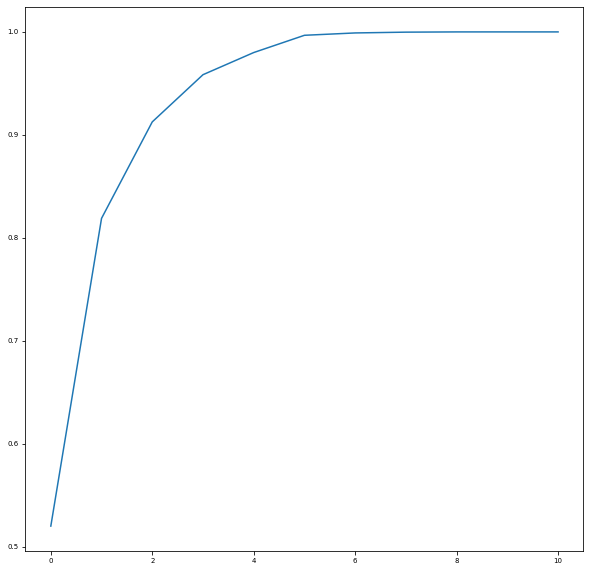

In [57]:
ratio = np.cumsum(D) / np.sum(D)
plt.plot(ratio)
plt.plot(np.cumsum(D[100:])/ np.sum(D))
x = np.where(ratio > 0.95)[0]
M = x[0]

print('Cantidad de autovectores de representación al 95 %: ', M)

## Análisis de clusteres

Cantidad de datos:  57 Cantidad de dimensiones:  11 Cantidad de autovectores de representación al 95 %:  3


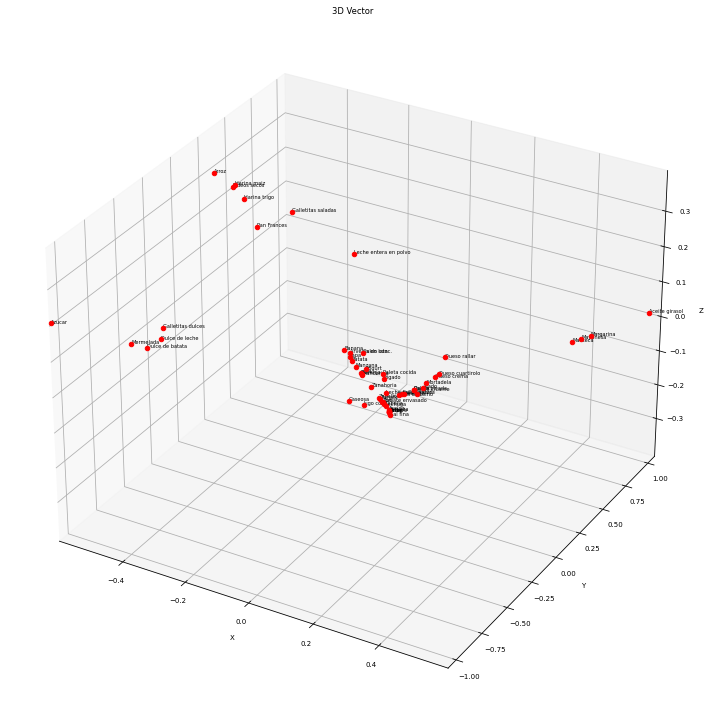

In [58]:
#proyección de los datos en el espacio de dimensión M
length, cantidad = X.shape
print('Cantidad de datos: ', cantidad, 'Cantidad de dimensiones: ', length, 'Cantidad de autovectores de representación al 95 %: ', M)

proyecciones = np.zeros((cantidad, M))

# Set the font size
plt.rcParams['font.size'] = 7

#set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], c='r', marker='o')
    ax.text(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], alimentos_arr[i], size=5, zorder=1, color='k')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector')

# Set limits for the axes
ax.set_xlim([-max(proyecciones[:, 0]), max(proyecciones[:, 0])])
ax.set_ylim([-max(proyecciones[:, 1]), max(proyecciones[:, 1])])
ax.set_zlim([-max(proyecciones[:, 2]), max(proyecciones[:, 2])])

# Show the plot
plt.tight_layout()
plt.show()

En este primer gráfico, se pueden observar claramente 4 grupos de alimentos:

- A la izquierda, están todos los dulces, que casualmente son sólidos. Estos alimentos tienen altos niveles de azúcar, a diferencia de los líquidos que pueden tener otras características. El análisis de componentes principales (ACP) resalta esta diferencia notablemente, separando a los líquidos dulces en otro grupo.

- A la derecha, se encuentran los alimentos con el más alto contenido en grasa: manteca, margarina, aceite y mayonesa. El ACP logra distinguirlos claramente del resto.

- Arriba, están los alimentos con alto nivel de hidratos de carbono, principalmente aquellos con harina como ingrediente principal. La leche en polvo también se incluye en este grupo, aunque está más centrada respecto a los demás.

- En el centro, se encuentra el grupo más grande, que será analizado con más profundidad en la siguiente celda.


Procedemos a ajustar los límites en cada eje para ver más claramente el último cluster:

Cantidad de datos:  57 Cantidad de dimensiones:  11


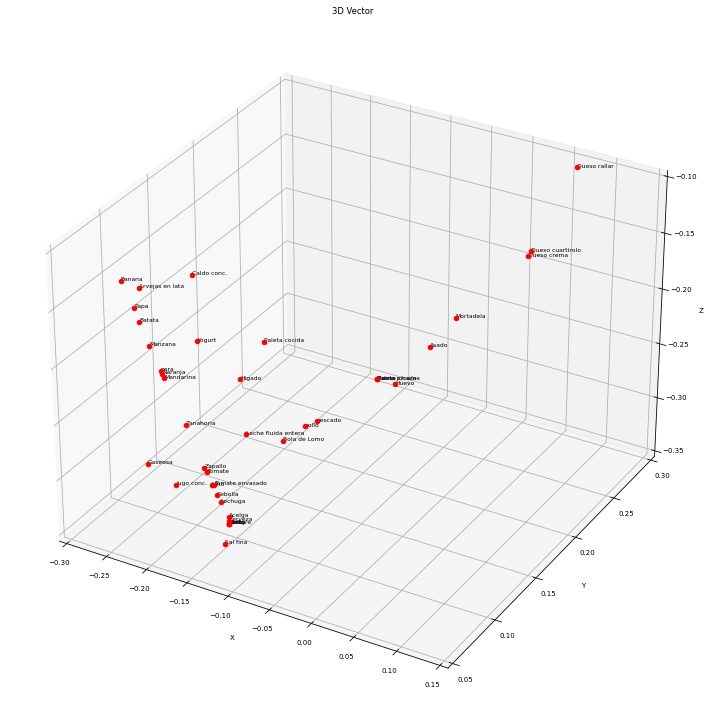

In [9]:
#proyección de los datos en el espacio de dimensión M
length, cantidad = X.shape
print('Cantidad de datos: ', cantidad, 'Cantidad de dimensiones: ', length)

proyecciones = np.zeros((cantidad, M))

# Set the font size
plt.rcParams['font.size'] = 7

#set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], c='r', marker='o')
    ax.text(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], alimentos_arr[i], size=6, zorder=1, color='k')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector')

# Set limits for the axes
ax.set_xlim([-0.3, 0.15])
ax.set_ylim([0.05, 0.3])
ax.set_zlim([-0.35, -0.1])

# Show the plot
plt.tight_layout()
plt.show()

Como primera observación, es importante notar que no es casual que todos los alimentos de este grupo sean mucho menos procesados, lo cual se refleja en sus características nutricionales más equilibradas y menos alteradas durante la producción. Estos alimentos no tienen una variable superlativa que los distinga del resto, lo que los hace necesarios para una dieta equilibrada y, por ende, más saludable.

Es notable la inclusión de la gaseosa y el jugo concentrado en este grupo, a pesar de no cumplir con las características mencionadas.

Dentro de este grupo se pueden observar diferentes "ramas" que no están igualmente diferenciadas, pero se puede notar un orden en la posición en ciertas direcciones.

- Se observa una línea recta desde la banana hacia el pequeño grupo de la acelga. Sobre esta línea se encuentran todas las frutas y verduras, lo cual es otro acierto destacable del Análisis de Componentes Principales (ACP).

- También se puede ver otra línea recta desde la bola de lomo hacia el queso de rallar, la cual está dividida en dos subgrupos de la misma categoría: carnes y quesos. Arriba de esta línea están los tres tipos de queso presentes en la tabla. Entre la carne y los quesos se encuentra la mortadela, un fiambre que tiene sentido nutricionalmente por ser una carne con un nivel de sodio más alto. Luego están todas las carnes y el huevo, que son similares nutricionalmente.

Por fuera de estas líneas rectas se encuentran algunos alimentos que no pertenecen a una categoría tan clara como los anteriores, pero se sitúan en posiciones intermedias lógicamente.


# Aumentos de Precios

# Consigna 4
Proyectar los alimentos de la tabla de Consumidores libres en el
espacio de generadores del ACP.

In [10]:
consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')
consumidores_libres.fillna(0, inplace=True)
consumidores_libres.head()

,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0


#### Proyección de los alimentos de la nueva tabla en el mismo espacio de generadores que usamos antes:

Cantidad de datos:  20 Cantidad de dimensiones:  11 Cantidad de autovectores de representación al 95 %:  3


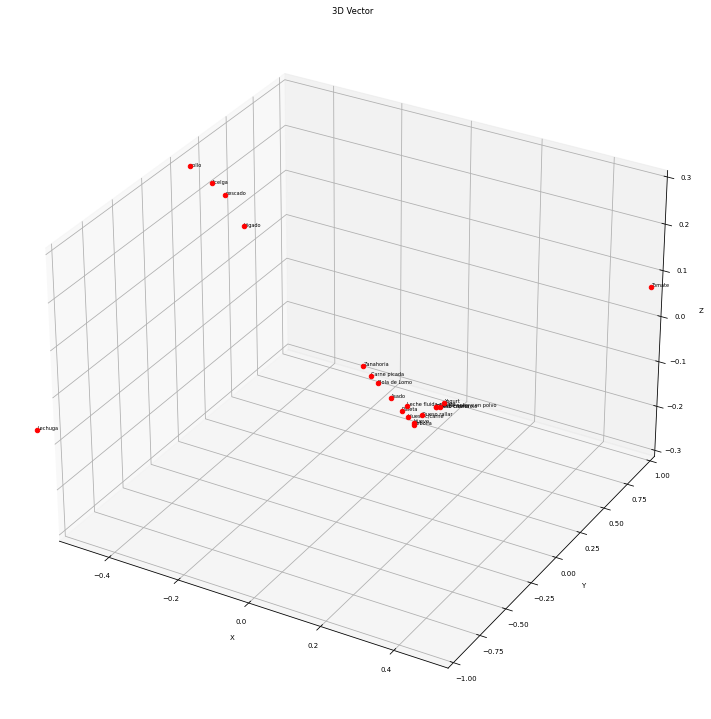

In [11]:


#escribo a mano los productos de la canasta básica (como están escritos ahí) que están en la tabla nutricional
productos = ['Aceite girasol', 'Arroz', 'Azucar', 'Fideos secos', 'Harina trigo', 'Huevo', 'Pan Frances', 'Leche fluida entera', 'Yerba', 'Zanahoria', 'Tomate', 'Cebolla', 'Papa', 'Acelga', 'Naranja', 'Manzana', 'Bola de Lomo', 'Asado', 'Paleta ', 'Carne picada']
no_estan = ['BERENJENAS']

#nueva tabla
tabla_nutricional_matriz = tabla_nutricional.copy()
#filtro los productos que no están en la tabla nutricional
tabla_nutricional_matriz = tabla_nutricional_matriz[tabla_nutricional_matriz['Alimento'].isin(productos)]
#saco los alimentos para tener sólo números
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Alimento', axis='columns')
#dividimos por la media para que los valores sean comparables
tabla_nutricional_matriz = tabla_nutricional_matriz.mul(1 / tabla_nutricional_matriz['Cantidad (gr/ml)'], axis=0)
#quitamos la columna de cantidad para que no afecte al cálculo
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Cantidad (gr/ml)', axis='columns')
#print(tabla_nutricional_matriz)
#convertimos a numpy para obtener una matriz 
tabla_nutricional_matriz = tabla_nutricional_matriz.to_numpy() 
#transponemos la tabla para que las columnas sean los alimentos como necesitamos
tabla_nutricional_matriz = tabla_nutricional_matriz.T 
#calculamos el nuevo ACP
D, V, X, m = calculoACP(tabla_nutricional_matriz)

#*Repetimos el proceso anterior:

#proyección de los datos en el espacio de dimensión M
length, cantidad = X.shape
print('Cantidad de datos: ', cantidad, 'Cantidad de dimensiones: ', length, 'Cantidad de autovectores de representación al 95 %: ', M)

proyecciones = np.zeros((cantidad, M))

# Set the font size
plt.rcParams['font.size'] = 7

#set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], c='r', marker='o')
    ax.text(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], alimentos_arr[i], size=5, zorder=1, color='k')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector')

# Set limits for the axes
ax.set_xlim([-max(proyecciones[:, 0]), max(proyecciones[:, 0])])
ax.set_ylim([-max(proyecciones[:, 1]), max(proyecciones[:, 1])])
ax.set_zlim([-max(proyecciones[:, 2]), max(proyecciones[:, 2])])
#ax.set_xlim([-max(proyecciones[:, 0])-1, max(proyecciones[:, 0])+1])
#ax.set_ylim([-max(proyecciones[:, 1])-1, max(proyecciones[:, 1])+1])
#ax.set_zlim([-max(proyecciones[:, 2])-1, max(proyecciones[:, 2])+1])

# Show the plot
plt.tight_layout()
plt.show()

# Mínimos Cuadrados

# Consigna 5

Aplicar Mínimos Cuadrados sobre los precios de cada nutriente (HC, Proteínas y grasas) para evaluar el aumento en estos 4 meses. Graficar cada punto de cada alimento y la recta obtenida por Mínimos Cuadrados. Hacer una tabla de los aumentos.

Se tomarán en cuenta los alimentos que están presentes en ambas tablas.


In [12]:
#acá en base a los productos de la tabla de aumentos, 
# busco en qué indice de la tabla nutricional se encuentran
producto_indices = []
for producto in productos:
    index = np.where(alimentos_arr == producto)[0]
    if index.size > 0:
        producto_indices.append(index[0])
    else:
        print(f"Producto {producto} no encontrado en alimentos_arr")
#producto_indices es un array que linkea los productos de la canasta básica con la tabla nutricional
# la posición en producto_indices es la misma que en la tabla de aumentos, 
# el valor, es el índice en la tabla nutricional
print(producto_indices)
print(len(producto_indices))

#elimino los productos que no están en la tabla nutricional de la tabla de aumentos
consumidores_libres = consumidores_libres.drop(consumidores_libres[consumidores_libres['PRODUCTOS'].isin(no_estan)].index)
#agrego una columna con el índice de la tabla nutricional
consumidores_libres['indice'] = producto_indices
consumidores_libres.head()


[33, 27, 44, 30, 28, 6, 26, 0, 56, 16, 17, 19, 31, 15, 22, 21, 11, 7, 8, 10]
20


,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,indice
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0,33
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0,27
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0,44
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0,30
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0,28


In [13]:
alimentos = consumidores_libres[['PRODUCTOS', 'indice']] #guardo los alimentos
consumidores_libres = consumidores_libres.drop('PRODUCTOS', axis='columns').drop('indice', axis='columns') #saco los alimentos para tener sólo números
consumidores_libres = consumidores_libres.mul(1 / consumidores_libres['Cantidad'], axis=0) #obtengo todas las filas a 1 gr
consumidores_libres[['PRODUCTOS', 'indice']] = alimentos # agrego alimentos devuelta
#tabla_nutricional = tabla_nutricional[['Alimento'] + [col for col in tabla_nutricional.columns] if col != ['Alimento']] #reordeno
consumidores_libres.head()

#lo mismo con la tabla nutricional

#elimino los que no están en los aumentos de la tabla nutricional
#print(tabla_nutricional.shape)
#tabla_nutricional = tabla_nutricional.drop(tabla_nutricional[~tabla_nutricional['Alimento'].isin(productos)].index)
#print(tabla_nutricional.shape)

#primero paso el aceite (92g por cada 100ml) a gramos (la leche es equivalente a 1g/ml)
tabla_nutricional.loc[tabla_nutricional['Alimento'] == 'Aceite girasol', 'Cantidad (gr/ml)'] = tabla_nutricional.loc[tabla_nutricional['Alimento'] == 'Aceite girasol', 'Cantidad (gr/ml)']*0.92

alimentos = tabla_nutricional['Alimento'] #guardo los alimentos

tabla_nutricional_precios = tabla_nutricional.copy()

tabla_nutricional_precios = tabla_nutricional_precios.drop('Alimento', axis='columns') #saco los alimentos para tener sólo números
tabla_nutricional_precios = tabla_nutricional_precios.mul(1 / tabla_nutricional_precios['Cantidad (gr/ml)'], axis=0) #obtengo todas las filas a 100 gr
tabla_nutricional_precios['Alimento'] = alimentos # agrego alimentos devuelta
tabla_nutricional_precios = tabla_nutricional_precios[['Alimento'] + [col for col in tabla_nutricional_precios.columns if col != 'Alimento']] #reordeno
tabla_nutricional_precios.head()


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,1.0,0.046000,0.031000,0.029000,0.0,0.018481,0.008111,0.001926,0.0,0.000570,0.001050,7.000000e-07
1,Leche entera en polvo,1.0,0.410000,0.258182,0.248182,0.0,0.147273,0.070000,0.005455,0.0,0.004040,0.009000,5.454545e-06
2,Yogurt,1.0,0.128947,0.026842,0.025789,0.0,0.016842,0.007368,0.000737,0.0,0.000421,0.000930,2.631579e-07
3,Queso crema,1.0,0.036145,0.060241,0.222892,0.0,0.216867,0.066265,0.006024,0.0,0.000741,0.000560,0.000000e+00
4,Queso cuartirolo,1.0,0.016393,0.210383,0.218579,0.0,0.207650,0.057377,0.005464,0.0,0.005694,0.004519,0.000000e+00


In [14]:
#repito el linkeo por indice
producto_indices = []

#filtro los productos que están en tabla de consumidores
tabla_nutricional_precios = tabla_nutricional_precios[tabla_nutricional_precios['Alimento'].isin(productos)]

for producto in productos:
    index = np.where(alimentos_arr == producto)[0]
    if index.size > 0:
        producto_indices.append(index[0])
    else:
        print(f"Producto {producto} no encontrado en alimentos_arr")

#ahora puedo unir ambas tablas por el índice
#recorro los productos de la canasta básica
for i in range(len(producto_indices)):
    #recorro los productos de la tabla de aumentos
    for row in consumidores_libres.iterrows():
        #si el índice coincide
        if row[1]['indice'] == producto_indices[i]:
            #copio los precios en la tabla nutricional
            tabla_nutricional_precios.at[producto_indices[i], '31/12/2023'] = row[1]['31/12/2023']
            tabla_nutricional_precios.at[producto_indices[i], '31/1/2024'] = row[1]['31/1/2024']
            tabla_nutricional_precios.at[producto_indices[i], '29/2/2024'] = row[1]['29/2/2024']
            tabla_nutricional_precios.at[producto_indices[i], '31/3/2024'] = row[1]['31/3/2024']
            tabla_nutricional_precios.at[producto_indices[i], '30/4/2024'] = row[1]['30/4/2024']
            
            break
tabla_nutricional_precios.fillna(0, inplace=True)
tabla_nutricional_aumentos = tabla_nutricional_precios.copy()
tabla_nutricional_precios.head()

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,Leche fluida entera,1.0,0.046,0.031,0.029000,0.0,0.018481,0.008111,0.001926,0.0,0.00057,0.00105,7.000000e-07,1.100000,1.210000,1.620000,1.890000,1.990000
6,Huevo,1.0,0.000,0.120,0.118125,0.0,0.031875,0.045000,0.028750,0.0,0.00135,0.00056,2.500000e-05,3.055556,3.611111,4.166667,4.722222,5.277778
7,Asado,1.0,0.000,0.186,0.150000,0.0,0.058600,0.065400,0.003780,0.0,0.00066,0.00015,2.240000e-05,5.400000,6.300000,7.500000,7.600000,7.750000
8,Paleta,1.0,0.000,0.200,0.100000,0.0,0.058667,0.065333,0.003733,0.0,0.00066,0.00012,2.266667e-05,5.200000,6.200000,7.100000,7.800000,7.900000
10,Carne picada,1.0,0.000,0.200,0.100000,0.0,0.058519,0.065556,0.003704,0.0,0.00066,0.00012,2.222222e-05,4.200000,4.800000,5.200000,5.200000,5.500000


In [15]:
#sumo todas las columnas de la tabla nutricional y me quedo con una fila
#tabla_nutricional_sum = tabla_nutricional_precios.sum(axis=0)*(1/19)
#print(tabla_nutricional_sum)

#ahora calculo el precio de cada nutriente por gramo
tabla_nutricional_precios['Proteina 31/12/2023'] = tabla_nutricional_precios['Proteinas (gr)']*tabla_nutricional_precios['31/12/2023']/100
tabla_nutricional_precios['HC 31/12/2023'] = tabla_nutricional_precios['HC (gr)']*tabla_nutricional_precios['31/12/2023']/100
tabla_nutricional_precios['Grasas 31/12/2023'] = tabla_nutricional_precios['Grasas (gr)']*tabla_nutricional_precios['31/12/2023']/100
tabla_nutricional_precios['Proteina 31/1/2024'] = tabla_nutricional_precios['Proteinas (gr)']*tabla_nutricional_precios['31/1/2024']/100
tabla_nutricional_precios['HC 31/1/2024'] = tabla_nutricional_precios['HC (gr)']*tabla_nutricional_precios['31/1/2024']/100
tabla_nutricional_precios['Grasas 31/1/2024'] = tabla_nutricional_precios['Grasas (gr)']*tabla_nutricional_precios['31/1/2024']/100
tabla_nutricional_precios['Proteina 29/2/2024'] = tabla_nutricional_precios['Proteinas (gr)']*tabla_nutricional_precios['29/2/2024']/100
tabla_nutricional_precios['HC 29/2/2024'] = tabla_nutricional_precios['HC (gr)']*tabla_nutricional_precios['29/2/2024']/100
tabla_nutricional_precios['Grasas 29/2/2024'] = tabla_nutricional_precios['Grasas (gr)']*tabla_nutricional_precios['29/2/2024']/100
tabla_nutricional_precios['Proteina 31/3/2024'] = tabla_nutricional_precios['Proteinas (gr)']*tabla_nutricional_precios['31/3/2024']/100
tabla_nutricional_precios['HC 31/3/2024'] = tabla_nutricional_precios['HC (gr)']*tabla_nutricional_precios['31/3/2024']/100
tabla_nutricional_precios['Grasas 31/3/2024'] = tabla_nutricional_precios['Grasas (gr)']*tabla_nutricional_precios['31/3/2024']/100
tabla_nutricional_precios['Proteina 30/4/2024'] = tabla_nutricional_precios['Proteinas (gr)']*tabla_nutricional_precios['30/4/2024']/100
tabla_nutricional_precios['HC 30/4/2024'] = tabla_nutricional_precios['HC (gr)']*tabla_nutricional_precios['30/4/2024']/100
tabla_nutricional_precios['Grasas 30/4/2024'] = tabla_nutricional_precios['Grasas (gr)']*tabla_nutricional_precios['30/4/2024']/100
#ahora el aumento porcentual por cada nutriente
#tabla_nutricional_precios['Proteina %'] = (tabla_nutricional_precios['Proteina 30/4/2024'] - tabla_nutricional_precios['Proteina 31/12/2023'])/tabla_nutricional_precios['Proteina 30/4/2024']*100
#tabla_nutricional_precios['HC %'] = (tabla_nutricional_precios['HC 30/4/2024'] - tabla_nutricional_precios['HC 31/12/2023'])/tabla_nutricional_precios['HC 30/4/2024']*100
#tabla_nutricional_precios['Grasas %'] = (tabla_nutricional_precios['Grasas 30/4/2024'] - tabla_nutricional_precios['Grasas 31/12/2023'])/tabla_nutricional_precios['Grasas 30/4/2024']*100

#sacamos la columna cantidad
tabla_nutricional_precios = tabla_nutricional_precios.drop('Cantidad (gr/ml)', axis='columns')
#y las columnas de nutrientes (las que no tienen un '20' en el nombre)
alimentos = tabla_nutricional_precios['Alimento'] #guardo los alimentos
tabla_nutricional_precios = tabla_nutricional_precios.filter(regex='20')
tabla_nutricional_precios['Alimento'] = alimentos # agrego alimentos devuelta

#saco las primeras 5 columnas porque son el precio de los alimentos enteros en cada mes
tabla_nutricional_precios = tabla_nutricional_precios.drop(tabla_nutricional_precios.columns[0:5], axis=1)

print(tabla_nutricional_precios.shape)
tabla_nutricional_precios.head()
#calculo el promedio de cada columna
#tabla_nutricional_sum = tabla_nutricional_precios.sum(axis=0).mul(1/19)
#print(tabla_nutricional_sum)

(20, 16)


,Proteina 31/12/2023,HC 31/12/2023,Grasas 31/12/2023,Proteina 31/1/2024,HC 31/1/2024,Grasas 31/1/2024,Proteina 29/2/2024,HC 29/2/2024,Grasas 29/2/2024,Proteina 31/3/2024,HC 31/3/2024,Grasas 31/3/2024,Proteina 30/4/2024,HC 30/4/2024,Grasas 30/4/2024,Alimento
0,0.000341,0.000506,0.000319,0.000375,0.000557,0.000351,0.000502,0.000745,0.000470,0.000586,0.000869,0.000548,0.000617,0.000915,0.000577,Leche fluida entera
6,0.003667,0.000000,0.003609,0.004333,0.000000,0.004266,0.005000,0.000000,0.004922,0.005667,0.000000,0.005578,0.006333,0.000000,0.006234,Huevo
7,0.010044,0.000000,0.008100,0.011718,0.000000,0.009450,0.013950,0.000000,0.011250,0.014136,0.000000,0.011400,0.014415,0.000000,0.011625,Asado
8,0.010400,0.000000,0.005200,0.012400,0.000000,0.006200,0.014200,0.000000,0.007100,0.015600,0.000000,0.007800,0.015800,0.000000,0.007900,Paleta
10,0.008400,0.000000,0.004200,0.009600,0.000000,0.004800,0.010400,0.000000,0.005200,0.010400,0.000000,0.005200,0.011000,0.000000,0.005500,Carne picada


In [16]:
#tomamos las columnas para cada nutriente

#filtro las columnas que tienen 'proteina' en el nombre y la de alimentos, y creo una nueva tabla
tabla_nutricional_proteina = tabla_nutricional_precios.filter(regex='Proteina')
tabla_nutricional_proteina['Alimento'] = alimentos # agrego alimentos devuelta
#filtro las columnas que tienen 'hc' en el nombre y la de alimentos, y creo una nueva tabla
tabla_nutricional_hc = tabla_nutricional_precios.filter(regex='HC')
tabla_nutricional_hc['Alimento'] = alimentos # agrego alimentos devuelta
#filtro las columnas que tienen 'grasas' en el nombre y la de alimentos, y creo una nueva tabla
tabla_nutricional_grasas = tabla_nutricional_precios.filter(regex='Grasas')
tabla_nutricional_grasas['Alimento'] = alimentos # agrego alimentos devuelta

# transformamos el DataFrame y agregmos la columna 'Mes' para poder graficar
df_proteina = tabla_nutricional_proteina.melt(id_vars=['Alimento'], var_name='Mes', value_name='Valor')
df_proteina['Mes'] = df_proteina['Mes'].str.replace(f'Proteina ', '')  # Limpiar los nombres de los meses
df_proteina['Mes'] = df_proteina['Mes'].astype(str)  # Asegurar que 'Mes' sea una cadena
df_proteina.dropna(inplace=True)  # Eliminar filas con valores nulos
#lo mismo para HC
df_hc = tabla_nutricional_hc.melt(id_vars=['Alimento'], var_name='Mes', value_name='Valor')
df_hc['Mes'] = df_hc['Mes'].str.replace(f'HC ', '')  # Limpiar los nombres de los meses
df_hc['Mes'] = df_hc['Mes'].astype(str)  # Asegurar que 'Mes' sea una cadena
df_hc.dropna(inplace=True)  # Eliminar filas con valores nulos
#lo mismo para grasas
df_grasas = tabla_nutricional_grasas.melt(id_vars=['Alimento'], var_name='Mes', value_name='Valor')
df_grasas['Mes'] = df_grasas['Mes'].str.replace(f'Grasas ', '')  # Limpiar los nombres de los meses
df_grasas['Mes'] = df_grasas['Mes'].astype(str)  # Asegurar que 'Mes' sea una cadena
df_grasas.dropna(inplace=True)  # Eliminar filas con valores nulos

df_proteina.head()

/tmp/ipykernel_56158/1219554367.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_nutricional_proteina['Alimento'] = alimentos # agrego alimentos devuelta
/tmp/ipykernel_56158/1219554367.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_nutricional_hc['Alimento'] = alimentos # agrego alimentos devuelta
/tmp/ipykernel_56158/1219554367.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,Alimento,Mes,Valor
0,Leche fluida entera,31/12/2023,0.000341
1,Huevo,31/12/2023,0.003667
2,Asado,31/12/2023,0.010044
3,Paleta,31/12/2023,0.010400
4,Carne picada,31/12/2023,0.008400


Coeficientes: x0 = 0.0025305861211202024, x1 = 0.0003263963472818528

Que tan bien ajusta el modelo?
R² (cuanto más cerca este al 0, mejor):  0.007596634197566843


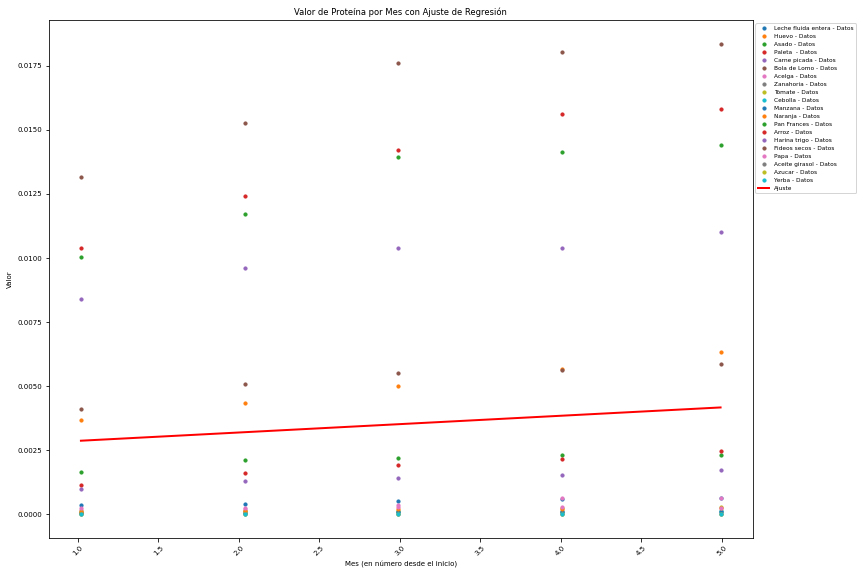

Coeficientes: x0 = 0.003718975061383655, x1 = 0.00047476956382883756

Que tan bien ajusta el modelo?
R² (cuanto más cerca este al 0, mejor):  0.0057724348407743875


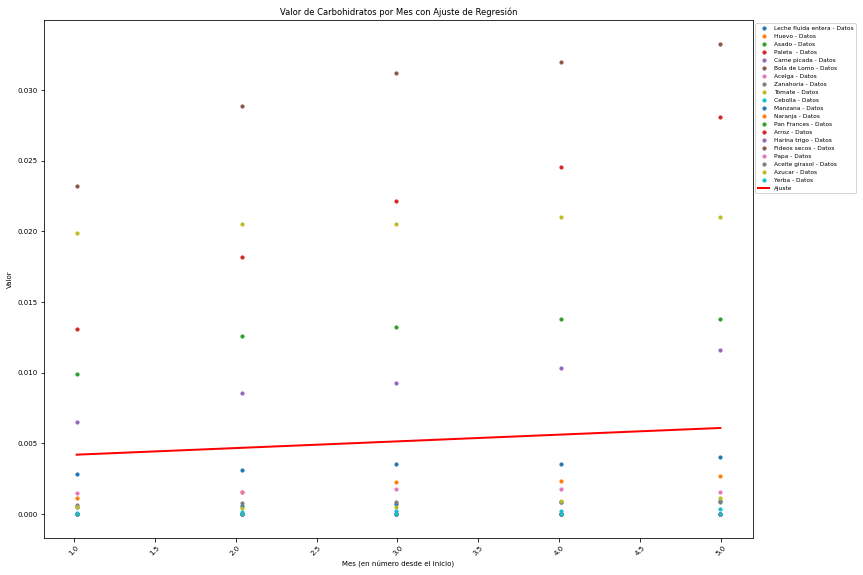

Coeficientes: x0 = 0.0019230905103972773, x1 = 0.00024748450568319873

Que tan bien ajusta el modelo?
R² (cuanto más cerca este al 0, mejor):  0.0037789980170167548


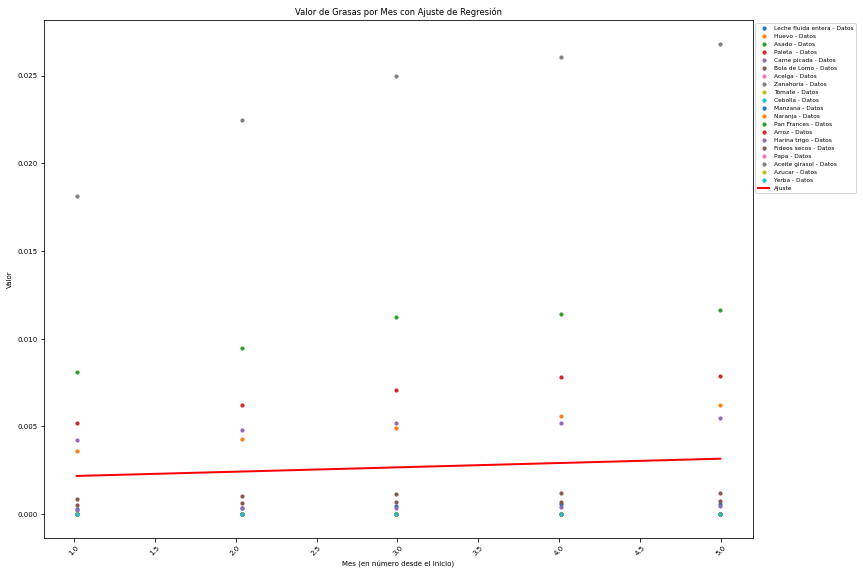

In [43]:
# convertimos las fechas en 'Mes' a un formato de datetime
df_proteina['Mes'] = pd.to_datetime(df_proteina['Mes'], format='%d/%m/%Y')
df_hc['Mes'] = pd.to_datetime(df_hc['Mes'], format='%d/%m/%Y')
df_grasas['Mes'] = pd.to_datetime(df_grasas['Mes'], format='%d/%m/%Y')

# definimos una fecha de inicio para calcular los meses desde esa fecha para que 31/12/2023 sea el mes 1.
fecha_inicio = pd.to_datetime('30/11/2023', format='%d/%m/%Y')

# calculamos el número de meses desde la fecha de inicio
df_proteina['Mes_Num'] = (df_proteina['Mes'] - fecha_inicio) / np.timedelta64(1, 'M')
df_hc['Mes_Num'] = (df_hc['Mes'] - fecha_inicio) / np.timedelta64(1, 'M')
df_grasas['Mes_Num'] = (df_grasas['Mes'] - fecha_inicio) / np.timedelta64(1, 'M')

# funcion que ajusta y grafica la regresión lineal usando mínimos cuadrados
def plot_nutrient_with_regression_manual(data, title):
    plt.figure(figsize=(12, 8))
    
    # ajustamos el modelo para el precio e funcion del tiempo
    X = data['Mes_Num'].values
    y = data['Valor'].values
    
    # armamos la matriz A
    A = np.vstack([np.ones(len(X)), X]).T
    
    # buscamos x usando la fórmula de mínimos cuadrados
    A_t = A.T
    A_t_A = np.dot(A_t, A)
    A_t_y = np.dot(A_t, y)
    x = np.linalg.solve(A_t_A, A_t_y)

    # Coeficientes obtenidos
    x0, x1 = x
    print(f'Coeficientes: x0 = {x0}, x1 = {x1}')
    print()
    
    
    # Predecir los valores ajustados
    y_pred = x0 + x1 * X
    
    # Calcular R² "manualmente"
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    

    print("Que tan bien ajusta el modelo?")
    print('R² (cuanto más cerca este al 0, mejor): ', r2)
    
    
    
    # graficamos los puntos y la línea ajustada
    for alimento in data['Alimento'].unique():
        subset = data[data['Alimento'] == alimento]
        plt.scatter(subset['Mes_Num'], subset['Valor'], label=f'{alimento} - Datos', s=10)  
    
    plt.plot(data['Mes_Num'], y_pred, label=f'Ajuste', color='red', linewidth=2)  
    plt.xlabel('Mes (en número desde el inicio)')
    plt.ylabel('Valor')
    plt.title(title)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# generamos un grafico para cada nutriente
plot_nutrient_with_regression_manual(df_proteina, 'Valor de Proteína por Mes con Ajuste de Regresión')
plot_nutrient_with_regression_manual(df_hc, 'Valor de Carbohidratos por Mes con Ajuste de Regresión')
plot_nutrient_with_regression_manual(df_grasas, 'Valor de Grasas por Mes con Ajuste de Regresión')


### Extra:

Hacemos cuadrados minimos usando la biblioteca sklearn, a modo de "chequeo" para ver si aplicamos bien cuadrados minimos usando lo aprendido en clase:

R^2:  0.007596634197567176


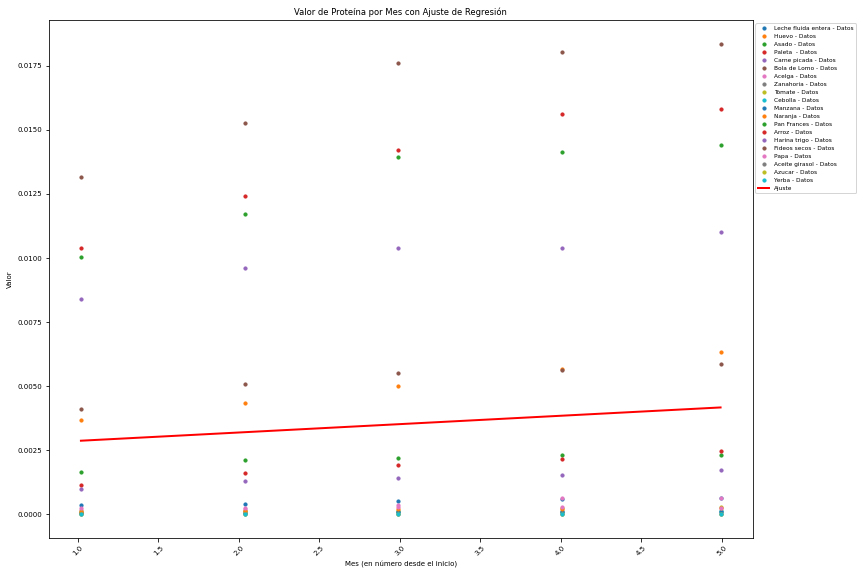

R^2:  0.0057724348407743875


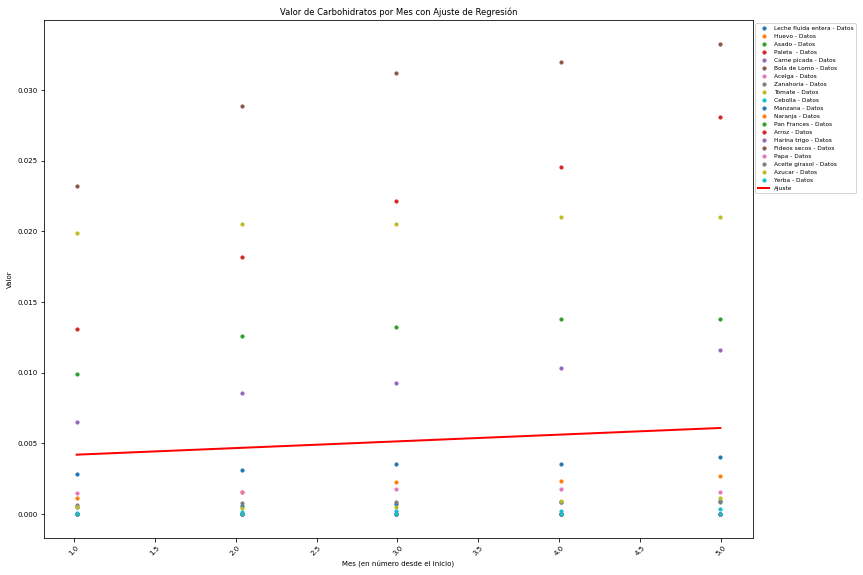

R^2:  0.0037789980170167548


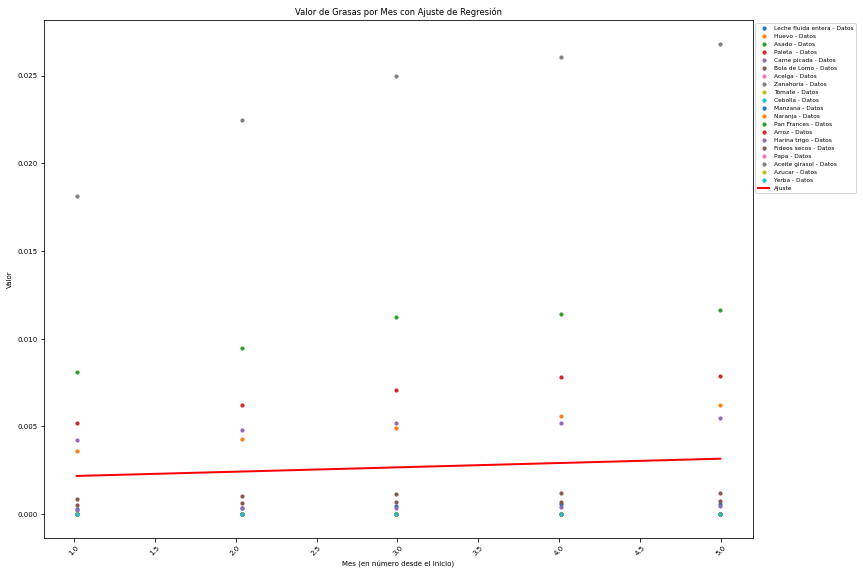

In [42]:
def plot_nutrient_with_regression_combined(data, title):
    plt.figure(figsize=(12, 8))
    
    # Ajustar el modelo de regresión lineal a todos los datos combinados
    X = data['Mes_Num'].values.reshape(-1, 1)  # Usar los valores numéricos de 'Mes_Num'
    y = data['Valor'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Predecir los valores ajustados
    y_pred = model.predict(X)
    
    #Calcular R² 
    
    r2 = model.score(X, y)
    

    print('R^2: ', r2)
    
    
    # Graficar los puntos y la línea ajustada
    for alimento in data['Alimento'].unique():
        subset = data[data['Alimento'] == alimento]
        plt.scatter(subset['Mes_Num'], subset['Valor'], label=f'{alimento} - Datos', s=10)  # Puntos originales
    
    plt.plot(data['Mes_Num'], y_pred, label=f'Ajuste', color='red', linewidth=2)  # Línea de regresión
    
    plt.xlabel('Mes (en número desde el inicio)')
    plt.ylabel('Valor')
    plt.title(title)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    
# Aplicar y graficar para cada nutriente
plot_nutrient_with_regression_combined(df_proteina, 'Valor de Proteína por Mes con Ajuste de Regresión')
plot_nutrient_with_regression_combined(df_hc, 'Valor de Carbohidratos por Mes con Ajuste de Regresión')
plot_nutrient_with_regression_combined(df_grasas, 'Valor de Grasas por Mes con Ajuste de Regresión')

Como podemos observar, los $R^2$ de los 3 primeros gráficos coinciden con los últimos 3, lo que indica que nuestro modelo original ajusta bien los valores predichos :)


# Consigna 6

Comparar el aumento de la carne en comparación con los otros rubros. Evaluar cómo queda la ingesta individual en relación con la tabla de metas de la OMS si la gente consume ese porcentaje menos de carne.


In [19]:
consumidores_libres
#veo la tabla completa y me fijo a mano para agrupar por ¿rubros?
#agrupo en vez de solo carne...meto a las proteinas todas juntas y asi con los demas alimentos.

,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,PRODUCTOS,indice
0,1.0,1.666667,2.066667,2.300000,2.400000,2.466667,ACEITE COCINERO GIRASOL,33
1,1.0,1.650000,2.300000,2.800000,3.100000,3.550000,ARROZ GRANO FINO,27
2,1.0,1.990000,2.050000,2.050000,2.100000,2.100000,AZUCAR LEDESMA,44
3,1.0,3.200000,3.980000,4.300000,4.400000,4.580000,FIDEOS GUISEROS,30
4,1.0,0.950000,1.250000,1.350000,1.500000,1.690000,HARINA DE TRIGO,28
5,1.0,3.055556,3.611111,4.166667,4.722222,5.277778,HUEVOS COLOR DOCENA,6
6,1.0,1.650000,2.100000,2.200000,2.300000,2.300000,PAN FRESCO,26
7,1.0,1.100000,1.210000,1.620000,1.890000,1.990000,LECHE c/VIT.FORT,0
8,1.0,2.800000,3.700000,4.600000,4.950000,5.500000,YERBA TARAGUI,56
9,1.0,0.820000,0.990000,1.100000,1.100000,1.100000,ZANAHORIAS,16


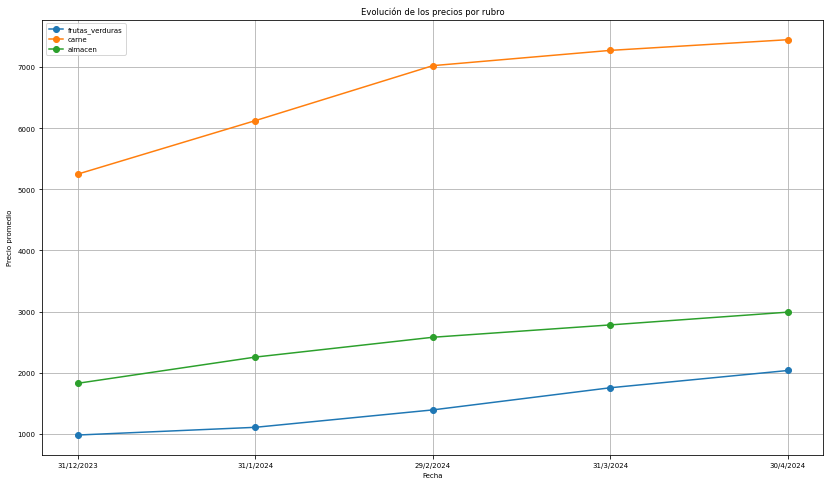

             Rubro  Aumento (%)
0  frutas_verduras   107.780612
1            carne    41.904762
2          almacen    63.746959


In [41]:
consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')

#vuelvo a pasar los alimentos a munisculas
consumidores_libres['PRODUCTOS'] = consumidores_libres['PRODUCTOS'].str.lower()

# defino los rubros de alimentos
grupos_alimentos = {
    'frutas_verduras': ['zanahorias', 'berenjenas', 'tomate perita', 'cebolla', 'papa negra', 'acelga paquete', 'naranja', 'manzana'],
    'carne': ['asado', 'paleta', 'bola de lomo', 'carne picada comun'],
    'almacen': ['yerba taragui', 'azucar ledesma', 'huevos color docena', 'aceite cocinero girasol','arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco','leche c/vit.fort'],
}

# filtro los datos de consumidores_libres para incluir solo los alimentos de los grupos específicos
consumidores_filtrado = consumidores_libres[consumidores_libres['PRODUCTOS'].isin(sum(grupos_alimentos.values(), []))]

# tomo las ultimas 4 columnas de archivo...los meses a evaluar
fechas = consumidores_libres.columns[-5:]

# creo un DataFrame para los precios a lo largo del tiempo
precios_tiempo = consumidores_filtrado.set_index('PRODUCTOS')[fechas].T

# calculo el aumento promedio para cada rubro y preparar los datos para graficar
aumentos_promedio = {}
datos_para_graficar = {}

for nombre, products in grupos_alimentos.items():
    # filtro precios de los productos del grupo
    datos = precios_tiempo[products].mean(axis=1)
    datos_para_graficar[nombre] = datos  # es el promedio de precios por fecha
    
    # calculo el aumento promedio de precios del grupo
    precio_inicial = datos[0]
    precio_final = datos[-1]
    aumento_promedio = ((precio_final - precio_inicial) / precio_inicial) * 100
    aumentos_promedio[nombre] = aumento_promedio

# creo el gráfico
plt.figure(figsize=(14, 8))

for nombre, datos in datos_para_graficar.items():
    plt.plot(fechas, datos, marker='o', linestyle='-', label=nombre)

plt.title('Evolución de los precios por rubro')
plt.xlabel('Fecha')
plt.ylabel('Precio promedio')
plt.legend()
plt.grid(True)
plt.show()

# me armo una tabla con los porcentajes de aumento
aumentos_df = pd.DataFrame(list(aumentos_promedio.items()), columns=['Rubro', 'Aumento (%)'])
print(aumentos_df)


Para facilitar el cálculo de promedios, pivoteamos la tabla `precios_tiempo` después de filtrar por grupos de consumidores. En esta tabla pivoteada, los alimentos quedan como columnas, lo que nos permite realizar análisis más detallados y comparativos entre los grupos.


In [21]:
precios_tiempo.head()

PRODUCTOS,aceite cocinero girasol,arroz grano fino,azucar ledesma,fideos guiseros,harina de trigo,huevos color docena,pan fresco,leche c/vit.fort,yerba taragui,zanahorias,...,tomate perita,cebolla,papa negra,acelga paquete,naranja,manzana,bola de lomo,asado,paleta,carne picada comun
31/12/2023,2500.0,1650.0,1990.0,1600.0,950.0,2200.0,1650.0,1100.0,2800.0,820.0,...,1200.0,500.0,850.0,450.0,920.0,1900.0,6200.0,5400.0,5200.0,4200.0
31/1/2024,3100.0,2300.0,2050.0,1990.0,1250.0,2600.0,2100.0,1210.0,3700.0,990.0,...,1100.0,700.0,890.0,620.0,1250.0,2100.0,7200.0,6300.0,6200.0,4800.0
29/2/2024,3450.0,2800.0,2050.0,2150.0,1350.0,3000.0,2200.0,1620.0,4600.0,1100.0,...,1200.0,990.0,1000.0,1100.0,1850.0,2400.0,8300.0,7500.0,7100.0,5200.0
31/3/2024,3600.0,3100.0,2100.0,2200.0,1500.0,3400.0,2300.0,1890.0,4950.0,1100.0,...,2300.0,1150.0,990.0,1990.0,1900.0,2400.0,8500.0,7600.0,7800.0,5200.0
30/4/2024,3700.0,3550.0,2100.0,2290.0,1690.0,3800.0,2300.0,1990.0,5500.0,1100.0,...,2700.0,1500.0,900.0,1990.0,2200.0,2700.0,8650.0,7750.0,7900.0,5500.0


In [22]:

alimentos_que_consideramos_carne = ['Asado', 'Paleta cocida', 'pescado', 'pollo', 'Higado', 'Bola de Lomo', 'Carne picada', 'Hueso c/carne', 'Paleta ']

columnas_numericas = ['Cantidad (gr/ml)', 'HC (gr)', 'Proteinas (gr)', 'Grasas (gr)',
                      'Azucares Libres (gr)', 'AGS (gr)', 'AGNI (gr)', 'AG p (gr)',
                      'Fibra (gr)', 'Na (gr)', 'Ca (gr)', 'Fe (gr)']

#creamos una copy para no modificar al original
tabla_nutricional_carne58 = tabla_nutricional_clean.copy()

#le calculamos a todos los valores el 42%
# Aplicar el factor 0.58 a las filas que contienen los alimentos especificados
tabla_nutricional_carne58.loc[tabla_nutricional_carne58['Alimento'].isin(alimentos_que_consideramos_carne), columnas_numericas] *= 0.58

# Mostrar las primeras filas del DataFrame resultante
tabla_nutricional_carne58.head(10)

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,270.00,12.42,8.370,7.83,0.0,4.9900,2.1900,0.52000,0.0,0.153900,0.283500,0.000189
1,Leche entera en polvo,11.00,4.51,2.840,2.73,0.0,1.6200,0.7700,0.06000,0.0,0.044440,0.099000,0.000060
2,Yogurt,19.00,2.45,0.510,0.49,0.0,0.3200,0.1400,0.01400,0.0,0.007990,0.017670,0.000005
3,Queso crema,1.66,0.06,0.100,0.37,0.0,0.3600,0.1100,0.01000,0.0,0.001230,0.000930,0.000000
4,Queso cuartirolo,3.66,0.06,0.770,0.80,0.0,0.7600,0.2100,0.02000,0.0,0.020840,0.016540,0.000000
5,Queso rallar,1.66,0.06,0.550,0.45,0.0,0.3600,0.1100,0.00800,0.0,0.020420,0.015780,0.000000
6,Huevo,16.00,0.00,1.920,1.89,0.0,0.5100,0.7200,0.46000,0.0,0.021600,0.008960,0.000400
7,Asado,29.00,0.00,5.394,4.35,0.0,1.6994,1.8966,0.10962,0.0,0.019140,0.004350,0.000650
8,Paleta,8.70,0.00,1.740,0.87,0.0,0.5104,0.5684,0.03248,0.0,0.005742,0.001044,0.000197
9,Hueso c/carne,8.70,0.00,1.740,0.87,0.0,0.5104,0.5684,0.03248,0.0,0.005742,0.001044,0.000197


In [23]:
tabla_nutricional_carne58.sum(numeric_only=True)#sumamos todos los valores numericos de tabla_nutricional

Cantidad (gr/ml)        1800.750000
HC (gr)                  409.970400
Proteinas (gr)            93.450000
Grasas (gr)               69.733200
Azucares Libres (gr)      56.750000
AGS (gr)                  21.772000
AGNI (gr)                 22.372140
AG p (gr)                 27.161740
Fibra (gr)                21.260000
Na (gr)                    3.269283
Ca (gr)                    0.707044
Fe (gr)                    0.021190
dtype: float64

In [24]:
# con la suma de los datos de tabla_nutricional_58 chequeamos a ver si los valores cumplen con lo propuesto por la OMS
oms_check(tabla_nutricional_carne58)

Condiciones OMS: 
(porcentaje de calorías sobre el total de calorías)
Proteinas 10-15 %
Carbohidratos totales 55-75 %
Grasas totales 15-30 %
Sodio 200 mg/dia
Fibra alimentaria total >25 g/dia
Frutas y verduras >= 400 g/dia

Cantidad total de alimentos (g): 1800.75
---
Proteinas 13.844444444444441
Cantidad (g): 93.44999999999999
Resultado: True
---
HC 60.736355555555555
Cantidad (g): 409.9704
Resultado: True
---
Grasas 23.2444
Cantidad (g): 69.7332
Resultado: True
---
Sodio 3.2692834
Cantidad (g): 3.2692834
Resultado: False
---
Fibra 21.26
Cantidad (g): 21.26
Resultado: False
---
Frutas y Verduras 634.0
Cantidad (g): 634.0
Resultado: True
---


False

### Comparación con Metas de la OMS

Al comparar los valores obtenidos con las metas de la OMS, se observa que el único nutriente que queda por debajo de la recomendación de la OMS es la fibra, mientras que el sodio queda por encima de la recomendación. Al mismo tiempo, se observa una mejora en comparación con los resultados del chequeo previamente realizado en el punto 2. Al reducir la ingesta de carne, se logró que los valores de la proteína cumplan con los establecidos por la OMS.


### Conclusión

Si la gente consume un 42% menos de carne debido al aumento del precio, la dieta de un argentino promedio estaría más cerca de cumplir con los valores recomendados por la OMS. Sin embargo, no estaría de más bajar el consumo de sodio en el día a día y buscar alimentos para ayudar a "levantar" los porcentajes en la ingesta de fibras, por ejemplo: frutas, verduras, legumbres y cereales integrales.


### Extra

Grafico que muestra el aumento individual de cada alimento desde el primer mes hasta el ultimo:

In [25]:
# filtramos los datos de consumidores_libres para incluir solo los alimentos
consumidores_filtrado = consumidores_libres[consumidores_libres['PRODUCTOS'].isin(sum(grupos_alimentos.values(), []))]
# armamos un nuevo dataframe
consumidores_con_aumentos = pd.DataFrame(consumidores_filtrado)
# calculamos el porcentaje de aumento
consumidores_con_aumentos["Aumento (%)"] = ((consumidores_libres["30/4/2024"] - consumidores_libres["31/12/2023"]) / consumidores_libres["31/12/2023"]) * 100
print("Aumentos por producto")
consumidores_con_aumentos


Aumentos por producto


,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,Aumento (%)
0,aceite cocinero girasol,1500,2500.0,3100.0,3450.0,3600.0,3700.0,48.000000
1,arroz grano fino,1000,1650.0,2300.0,2800.0,3100.0,3550.0,115.151515
2,azucar ledesma,1000,1990.0,2050.0,2050.0,2100.0,2100.0,5.527638
3,fideos guiseros,500,1600.0,1990.0,2150.0,2200.0,2290.0,43.125000
4,harina de trigo,1000,950.0,1250.0,1350.0,1500.0,1690.0,77.894737
5,huevos color docena,720,2200.0,2600.0,3000.0,3400.0,3800.0,72.727273
6,pan fresco,1000,1650.0,2100.0,2200.0,2300.0,2300.0,39.393939
7,leche c/vit.fort,1000,1100.0,1210.0,1620.0,1890.0,1990.0,80.909091
8,yerba taragui,1000,2800.0,3700.0,4600.0,4950.0,5500.0,96.428571
9,zanahorias,1000,820.0,990.0,1100.0,1100.0,1100.0,34.146341


# Consigna 7

Proponer dos alimentos de la tabla 3 que puedan reemplazar la disminución del 18.5% en el consumo de carne sin perder valor nutricional. Corroborar con la tabla de metas de la OMS la dieta diaria obtenida. Además, se impone como restricción en la elección que el precio de los alimentos de reemplazo debe ser menor al 50% del aumento del precio de la carne.


In [26]:

carnes = ['Asado', 'Bola de Lomo', 'Paleta ', 'Carne picada'] #agrupo las 4 carnes
carnes_data = tabla_nutricional_clean[tabla_nutricional_clean['Alimento'].isin(carnes)] #filtro en el dataset para buscar esas 4 filas

total_nutrientes = carnes_data.sum(numeric_only=True) #sumo las cantidades y los nutrientes
print(total_nutrientes)


Cantidad (gr/ml)        126.00000
HC (gr)                   0.00000
Proteinas (gr)           24.91000
Grasas (gr)              12.18000
Azucares Libres (gr)      0.00000
AGS (gr)                  7.38000
AGNI (gr)                 8.22000
AG p (gr)                 0.47500
Fibra (gr)                0.00000
Na (gr)                   0.08214
Ca (gr)                   0.01356
Fe (gr)                   0.00324
dtype: float64


In [27]:
new_row = {'Alimento': 'carnes'} #creo la nueva fila 
for col in total_nutrientes.index:
    new_row[col] = total_nutrientes[col]

tabla_nutricional_carnes = tabla_nutricional_clean.append(new_row, ignore_index=True) #agrego la nueva fila "carnes" al dataframe
tabla_nutricional_carnes.tail()

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
53,Sal fina,5.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000,0.0,2.00000,0.00000,0.00000
54,Vinagre,3.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000,0.0,0.00000,0.00000,0.00000
55,Cafe,1.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000,0.0,0.00000,0.00000,0.00000
56,Yerba,20.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000,0.0,0.00000,0.00000,0.00000
57,carnes,126.0,0.0,24.91,12.18,0.0,7.38,8.22,0.475,0.0,0.08214,0.01356,0.00324


In [28]:
#busco cuales serian los valores nutricionales de ese 18,5% 

# Calculate 18.5% of the 'carnes' row
carnes_row = tabla_nutricional_carnes[tabla_nutricional_carnes['Alimento'] == 'carnes'] #calculo el 18,5% de la fila
carnes_18_5 = carnes_row.iloc[:, 1:] * 0.185


print(carnes_18_5.T)
#me quedo el indile de la fila (57) ahi arriba

                             57
Cantidad (gr/ml)      23.310000
HC (gr)                0.000000
Proteinas (gr)         4.608350
Grasas (gr)            2.253300
Azucares Libres (gr)   0.000000
AGS (gr)               1.365300
AGNI (gr)              1.520700
AG p (gr)              0.087875
Fibra (gr)             0.000000
Na (gr)                0.015196
Ca (gr)                0.002509
Fe (gr)                0.000599


In [29]:
carnes_consumidores = ['asado', 'paleta', 'bola de lomo', 'carne picada comun'] #agrupo las 4 carnes
precios_carne = consumidores_libres[consumidores_libres['PRODUCTOS'].isin(carnes_consumidores)] #filtro en el dataset para buscar esas 4 filas
precio = precios_carne.sum(numeric_only=True) #sumo las cantidades y los precios
print(precio)


Cantidad       4000.0
31/12/2023    21000.0
31/1/2024     24500.0
29/2/2024     28100.0
31/3/2024     29100.0
30/4/2024     29800.0
dtype: float64


Calculamos las nutrientes de ese 18.5% usando código del punto 6. Ese es nuestro objetivo de reemplazo.

In [30]:
#total_nutrientes son los valores nutricionales de las carnes
nutrientes_carne185 = total_nutrientes * 0.185
nutrientes_carne185

Cantidad (gr/ml)        23.310000
HC (gr)                  0.000000
Proteinas (gr)           4.608350
Grasas (gr)              2.253300
Azucares Libres (gr)     0.000000
AGS (gr)                 1.365300
AGNI (gr)                1.520700
AG p (gr)                0.087875
Fibra (gr)               0.000000
Na (gr)                  0.015196
Ca (gr)                  0.002509
Fe (gr)                  0.000599
dtype: float64

### Observación

Entendemos que la restricción de que el precio de los alimentos de reemplazo debe ser menor al 50% del aumento de la carne se refiere a la diferencia en dinero entre lo que costaba comprar los 4 alimentos de carne en el primer mes y en el segundo mes.

Por lo tanto, los alimentos que propongamos no deben superar en precio la mitad de esa diferencia.


In [31]:
#tabla_nutricional_aumentos es la tabla nutricional con los precios de los alimentos
tabla_nutricional_aumentos.head()


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,Leche fluida entera,1.0,0.046,0.031,0.029000,0.0,0.018481,0.008111,0.001926,0.0,0.00057,0.00105,7.000000e-07,1.100000,1.210000,1.620000,1.890000,1.990000
6,Huevo,1.0,0.000,0.120,0.118125,0.0,0.031875,0.045000,0.028750,0.0,0.00135,0.00056,2.500000e-05,3.055556,3.611111,4.166667,4.722222,5.277778
7,Asado,1.0,0.000,0.186,0.150000,0.0,0.058600,0.065400,0.003780,0.0,0.00066,0.00015,2.240000e-05,5.400000,6.300000,7.500000,7.600000,7.750000
8,Paleta,1.0,0.000,0.200,0.100000,0.0,0.058667,0.065333,0.003733,0.0,0.00066,0.00012,2.266667e-05,5.200000,6.200000,7.100000,7.800000,7.900000
10,Carne picada,1.0,0.000,0.200,0.100000,0.0,0.058519,0.065556,0.003704,0.0,0.00066,0.00012,2.222222e-05,4.200000,4.800000,5.200000,5.200000,5.500000


In [32]:
# alimentes_cantidades es la tabla nutricional sólo con las cantidades de los alimentos
alimentos_cantidades.head()

,Alimento,Cantidad (gr/ml)
0,Leche fluida entera,270.00
1,Leche entera en polvo,11.00
2,Yogurt,19.00
3,Queso crema,1.66
4,Queso cuartirolo,3.66


En la siguiente celda tomamos la tabla normalizada y la multiplicamos por las cantidades correspondientes

In [33]:
#ahora puedo unir ambas tablas por el índice
#recorro los productos de la canasta básica
for row1 in alimentos_cantidades.iterrows():
    
    #recorro los productos de la tabla de aumentos
    for row in tabla_nutricional_aumentos.iterrows():
        #si el índice coincide
        if row[1]['Alimento'] == row1[1]['Alimento']:
            #multiplicar toda la fila por la cantidad
            # Multiplicar toda la fila excepto la columna 'Alimento' por la cantidad correspondiente
            for col in tabla_nutricional_aumentos.columns:
                if col != 'Alimento':
                    tabla_nutricional_aumentos.at[row[0], col] *= row1[1][1]
           
            #tabla_nutricional_aumentos.at[:, row[0]] *= row1[1]['Cantidad']

            break
tabla_nutricional_aumentos.fillna(0, inplace=True)
tabla_nutricional_aumentos.head() 


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,Leche fluida entera,270.0,12.42,8.37,7.83,0.0,4.99,2.19,0.520,0.0,0.15390,0.28350,0.000189,297.000000,326.700000,437.400000,510.300000,537.300000
6,Huevo,16.0,0.00,1.92,1.89,0.0,0.51,0.72,0.460,0.0,0.02160,0.00896,0.000400,48.888889,57.777778,66.666667,75.555556,84.444444
7,Asado,50.0,0.00,9.30,7.50,0.0,2.93,3.27,0.189,0.0,0.03300,0.00750,0.001120,270.000000,315.000000,375.000000,380.000000,387.500000
8,Paleta,15.0,0.00,3.00,1.50,0.0,0.88,0.98,0.056,0.0,0.00990,0.00180,0.000340,78.000000,93.000000,106.500000,117.000000,118.500000
10,Carne picada,27.0,0.00,5.40,2.70,0.0,1.58,1.77,0.100,0.0,0.01782,0.00324,0.000600,113.400000,129.600000,140.400000,140.400000,148.500000


Con esta tabla, filtramos las carnes, sumamos todo, y calculamos la diferencia. La mitad es nuestra restricción.

Sobre la tabla generada, hacemos la reducción de carnes de un 18.5% (tomar el 81.5%)

In [34]:
carnes185_tabla_nutricional = tabla_nutricional_aumentos.copy()
carnes185_tabla_nutricional.reset_index(drop=True, inplace=True)
carnes_consumidores = ['Asado', 'Paleta ', 'Bola de Lomo', 'Carne picada'] #agrupo las 4 carnes

# obtener los indices de las carnes en la tabla nutricional para  modificar en el lugar los valores nutricionales
carnes_indices = carnes185_tabla_nutricional[carnes185_tabla_nutricional['Alimento'].isin(carnes_consumidores)].index
print(carnes_indices)
# filtro los alimentos que son carnes
carnes = carnes185_tabla_nutricional[carnes185_tabla_nutricional['Alimento'].isin(carnes_consumidores)]

#calculo el 81.5% de los valores nutricionales de las carnes, modificando sólo las columnas numericas
carnes185_tabla_nutricional.iloc[carnes_indices, 1:] *=0.815

print('El asado antes tenía 50gr, ahora:')
carnes185_tabla_nutricional.head(10)
carnes185_tabla_nutricional.iloc[carnes_indices, :]

Int64Index([2, 3, 4, 5], dtype='int64')
El asado antes tenía 50gr, ahora:


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
2,Asado,40.750,0.0,7.57950,6.1125,0.0,2.38795,2.66505,0.154035,0.0,0.026895,0.006112,0.000913,220.050,256.725,305.6250,309.700,315.8125
3,Paleta,12.225,0.0,2.44500,1.2225,0.0,0.71720,0.79870,0.045640,0.0,0.008068,0.001467,0.000277,63.570,75.795,86.7975,95.355,96.5775
4,Carne picada,22.005,0.0,4.40100,2.2005,0.0,1.28770,1.44255,0.081500,0.0,0.014523,0.002641,0.000489,92.421,105.624,114.4260,114.426,121.0275
5,Bola de Lomo,27.710,0.0,5.87615,0.3912,0.0,1.62185,1.79300,0.105950,0.0,0.017457,0.000831,0.000962,171.802,199.512,229.9930,235.535,239.6915


In [35]:
tabla_nutricional_aumentos

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,Leche fluida entera,270.0,12.42,8.37,7.830000,0.0,4.990000,2.190,0.520000,0.00,0.15390,0.28350,0.000189,297.000000,326.700000,437.400000,510.300000,537.300000
6,Huevo,16.0,0.00,1.92,1.890000,0.0,0.510000,0.720,0.460000,0.00,0.02160,0.00896,0.000400,48.888889,57.777778,66.666667,75.555556,84.444444
7,Asado,50.0,0.00,9.30,7.500000,0.0,2.930000,3.270,0.189000,0.00,0.03300,0.00750,0.001120,270.000000,315.000000,375.000000,380.000000,387.500000
8,Paleta,15.0,0.00,3.00,1.500000,0.0,0.880000,0.980,0.056000,0.00,0.00990,0.00180,0.000340,78.000000,93.000000,106.500000,117.000000,118.500000
10,Carne picada,27.0,0.00,5.40,2.700000,0.0,1.580000,1.770,0.100000,0.00,0.01782,0.00324,0.000600,113.400000,129.600000,140.400000,140.400000,148.500000
11,Bola de Lomo,34.0,0.00,7.21,0.480000,0.0,1.990000,2.200,0.130000,0.00,0.02142,0.00102,0.001180,210.800000,244.800000,282.200000,289.000000,294.100000
15,Acelga,25.0,0.00,0.73,0.000000,0.0,0.000000,0.000,0.000000,0.40,0.05875,0.02875,0.000450,12.500000,17.222222,30.555556,55.277778,55.277778
16,Zanahoria,27.0,2.16,0.29,0.000000,0.0,0.000000,0.000,0.000000,0.82,0.00594,0.00999,0.000130,22.140000,26.730000,29.700000,29.700000,29.700000
17,Tomate,69.0,2.83,0.69,0.000000,0.0,0.000000,0.000,0.000000,0.83,0.00345,0.00621,0.001150,82.800000,75.900000,82.800000,158.700000,186.300000
19,Cebolla,44.0,0.97,0.35,0.000000,0.0,0.000000,0.000,0.000000,0.57,0.01144,0.01144,0.000250,22.000000,30.800000,43.560000,50.600000,66.000000


In [36]:
tabla_nutricional_aumentos_carnes = tabla_nutricional_aumentos.copy()

#filtramos las carnes
tabla_nutricional_aumentos_carnes = tabla_nutricional_aumentos_carnes[tabla_nutricional_aumentos_carnes['Alimento'].isin(carnes_consumidores)]

#sumo todas las columnas de la tabla nutricional y me quedo con una fila
tabla_nutricional_sum = tabla_nutricional_aumentos_carnes.sum(axis=0)
#restamos el precio en el primer mes al ultimo mes
diferencia_de_precios = tabla_nutricional_sum['30/4/2024'] - tabla_nutricional_sum['31/12/2023']
print('La diferencia de precios para la carne entre el 31/12/2023 y el 30/4/2024 es de: $', diferencia_de_precios)
print('La mitad de eso es: $', diferencia_de_precios/2)

La diferencia de precios para la carne entre el 31/12/2023 y el 30/4/2024 es de: $ 276.4
La mitad de eso es: $ 138.2


### Resultados de Pruebas

In [76]:

reemplazos_tabla_nutricional = carnes185_tabla_nutricional.copy()

agregados = pd.concat([
    reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Leche fluida entera'].iloc[:, 1:]*.3
    #reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Papa'].iloc[:, 1:]*.3
    ])

print('Calcio agregado:', agregados['Ca (gr)'].sum()-nutrientes_carne185['Ca (gr)'])
print('Hierro agregado:', agregados.sum(axis=0)[6]-nutrientes_carne185['Fe (gr)'])
print('Nutrientes agregados:')
print(agregados.sum(axis=0)[0:10]- nutrientes_carne185)

print("Presupuesto restante:", diferencia_de_precios/2- agregados.sum(axis=0)[-1].sum())
agregados

Calcio agregado: 0.08254139999999999
Hierro agregado: 0.6564005999999999
Nutrientes agregados:
AG p (gr)                0.068125
AGNI (gr)               -0.863700
AGS (gr)                 0.131700
Azucares Libres (gr)     0.000000
Ca (gr)                       NaN
Cantidad (gr/ml)        57.690000
Fe (gr)                       NaN
Fibra (gr)               0.000000
Grasas (gr)              0.095700
HC (gr)                  3.726000
Na (gr)                  0.030974
Proteinas (gr)          -2.097350
dtype: float64
Presupuesto restante: -22.98999999999998


,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,81.0,3.726,2.511,2.349,0.0,1.497,0.657,0.156,0.0,0.04617,0.08505,0.000057,89.1,98.01,131.22,153.09,161.19


In [73]:

reemplazos_tabla_nutricional = carnes185_tabla_nutricional.copy()

agregados = pd.concat([
    reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Huevo'].iloc[:, 1:]*1.8
    #reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Papa'].iloc[:, 1:]*.3
    ])

print('Calcio agregado:', agregados['Ca (gr)'].sum()-nutrientes_carne185['Ca (gr)'])
print('Hierro agregado:', agregados.sum(axis=0)[6]-nutrientes_carne185['Fe (gr)'])
print('Nutrientes agregados:')
print(agregados.sum(axis=0)[0:10]- nutrientes_carne185)

print("Presupuesto restante:", diferencia_de_precios/2- agregados.sum(axis=0)[-1].sum())
agregados

Calcio agregado: 0.013619400000000004
Hierro agregado: 1.2954006
Nutrientes agregados:
AG p (gr)               0.740125
AGNI (gr)              -0.224700
AGS (gr)               -0.447300
Azucares Libres (gr)    0.000000
Ca (gr)                      NaN
Cantidad (gr/ml)        5.490000
Fe (gr)                      NaN
Fibra (gr)              0.000000
Grasas (gr)             1.148700
HC (gr)                 0.000000
Na (gr)                 0.023684
Proteinas (gr)         -1.152350
dtype: float64
Presupuesto restante: -13.800000000000011


,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
1,28.8,0.0,3.456,3.402,0.0,0.918,1.296,0.828,0.0,0.03888,0.016128,0.00072,88.0,104.0,120.0,136.0,152.0


Probamos con los alimentos cercanos a las carnes en el espacio proyectado del ACP y no alcanzamos a cubrir los nutrientes necesarios con el presupuesto disponible.

Por ejemplo, esta última prueba arriba, con el huevo, o con la leche, no alcanza a cubrir las proteínas necesarias pero se pasa de presupuesto.

Después de realizar algunas pruebas, observamos que aumentar en un 20% el consumo de pan y en un 35% el consumo de aceite de girasol logra reemplazar perfectamente todos los nutrientes incluidos en la carne que se quitó.

Este ajuste en la dieta permite mantener un equilibrio nutricional adecuado sin perder valor nutricional, sustituyendo la disminución en el consumo de carne con alternativas viables y económicamente viables según las restricciones mencionadas.


In [37]:

reemplazos_tabla_nutricional = carnes185_tabla_nutricional.copy()

#modifico sólo las columas que no son alimento y agrego un 50% a toda la fila de 'Papa'
#print(reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Papa'].iloc[:, 1:]*0.5)
#print(reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Huevo'].iloc[:, 1:])
#print(reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Leche fluida entera'].iloc[:, 1:])

#print(reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Pan Frances'].iloc[:, 1:]*.20)
#print(reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Aceite girasol'].iloc[:, 1:]*.25)

#reemplazos_tabla_nutricional['Papa'].iloc[:, 1:] = reemplazos_tabla_nutricional['Papa'].iloc[:, 1:] * 1.5
#print(reemplazos_tabla_nutricional['Papa'].iloc[:, 1:])


#agregados = pd.concat([reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Pan Frances'].iloc[:, 1:]*.22, reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Aceite girasol'].iloc[:, 1:]*.22])
agregados = pd.concat([
    reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Pan Frances'].iloc[:, 1:]*.2, 
    reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Aceite girasol'].iloc[:, 1:]*.35])

print('Calcio agregado:', agregados['Ca (gr)'].sum()-nutrientes_carne185['Ca (gr)'])
print('Hierro agregado:', agregados.sum(axis=0)[6]-nutrientes_carne185['Fe (gr)'])
print('Nutrientes agregados:')
print(agregados.sum(axis=0)[0:10]- nutrientes_carne185)

print("Presupuesto restante:", diferencia_de_precios/2- agregados.sum(axis=0)[-1].sum())
agregados

Calcio agregado: 0.006383400000000001
Hierro agregado: 2.9744005999999996
Nutrientes agregados:
AG p (gr)                7.893647
AGNI (gr)                1.454300
AGS (gr)                 0.046113
Azucares Libres (gr)     0.000000
Ca (gr)                       NaN
Cantidad (gr/ml)        35.390000
Fe (gr)                       NaN
Fibra (gr)               1.264000
Grasas (gr)             10.681483
HC (gr)                 28.080000
Na (gr)                  0.048452
Proteinas (gr)           0.071650
dtype: float64
Presupuesto restante: 1.2066666666666492


,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
12,46.8,28.08,4.68,0.000000,0.0,0.000000,0.000,0.000000,1.264,0.063648,0.008892,0.001558,77.220000,98.280000,102.96,107.64,107.640000
17,11.9,0.00,0.00,12.934783,0.0,1.411413,2.975,7.981522,0.000,0.000000,0.000000,0.000000,19.833333,24.593333,27.37,28.56,29.353333


Ahora agregamos esos porcentajes a la dieta y verificamos resultados según la OMS

In [38]:
# obtener los indices de los alimentos en la tabla nutricional para modificar en el lugar los valores nutricionales
pan_indice = reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Pan Frances'].index
aceite_indice = reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Aceite girasol'].index

reemplazos_tabla_nutricional.iloc[np.array([pan_indice[0], aceite_indice[0]]), :]

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
12,Pan Frances,234.0,140.4,23.4,0.000000,0.0,0.000000,0.0,0.000000,6.32,0.31824,0.04446,0.00779,386.100000,491.400000,514.8,538.2,538.200000
17,Aceite girasol,34.0,0.0,0.0,36.956522,0.0,4.032609,8.5,22.804348,0.00,0.00000,0.00000,0.00000,56.666667,70.266667,78.2,81.6,83.866667


In [39]:
#calculo el aumento de los alimentos seleccionados
reemplazos_tabla_nutricional.iloc[pan_indice, 1:] *= 1.2
reemplazos_tabla_nutricional.iloc[aceite_indice, 1:] *= 1.35
reemplazos_tabla_nutricional#.head(10)
reemplazos_tabla_nutricional.iloc[np.array([pan_indice[0], aceite_indice[0]]), :]

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
12,Pan Frances,280.8,168.48,28.08,0.000000,0.0,0.000000,0.000,0.00000,7.584,0.381888,0.053352,0.009348,463.32,589.68,617.76,645.84,645.84
17,Aceite girasol,45.9,0.00,0.00,49.891304,0.0,5.444022,11.475,30.78587,0.000,0.000000,0.000000,0.000000,76.50,94.86,105.57,110.16,113.22


In [40]:
oms_check(reemplazos_tabla_nutricional)

Condiciones OMS: 
(porcentaje de calorías sobre el total de calorías)
Proteinas 10-15 %
Carbohidratos totales 55-75 %
Grasas totales 15-30 %
Sodio 200 mg/dia
Fibra alimentaria total >25 g/dia
Frutas y verduras >= 400 g/dia

Cantidad total de alimentos (g): 1413.39
---
Proteinas 12.115799999999997
Cantidad (g): 81.78164999999998
Resultado: True
---
HC 57.02074074074074
Cantidad (g): 384.89
Resultado: True
---
Grasas 23.876001449275364
Cantidad (g): 71.62800434782609
Resultado: True
---
Sodio 0.7747921000000001
Cantidad (g): 0.7747921000000001
Resultado: False
---
Fibra 19.284
Cantidad (g): 19.284
Resultado: False
---
Frutas y Verduras 498.0
Cantidad (g): 498.0
Resultado: True
---


False

# Preguntas

La CBA normal tiene alto porcentaje de proteínas?
SI, PENSA QUE LOS ARGENTINOS TENDEMOS A CONSUMIR MUCHA MAS CARNE QUE POR EJEMPLO OTRO LADO DEL MUNDO JAJAJAJA. ASI QUE SI, ES POSIBLE QUE CBA TENGA ALTO PORSENTAJE EN PROTEINAS

La fibra no alcanza en ninguna?



# Consigna 8

Proponer dos alimentos de la tabla 1 que estén lejanos en el sentido de distancia euclidiana en el espacio de generadores del ACP, que puedan reemplazar la cantidad de proteína perdida. Se pueden considerar todos los alimentos de la tabla 1. Luego, corroborar cómo varían los objetivos ahora en la tabla de metas de la OMS en cada caso.


## Dudas

En alguno de los puntos pide que sólo con elegir 1 de los 2 ya cumpla la condición? 

Tendría más sentido el segundo ya que la condición es menos fuerte.


YO ENTIENDO QUE HAY QUE AGARRAR DOS PTS Y VER SI ESOS DOS PTS LEJANOS. EJ:ACEITE DE GIRASOL Y AZUCAR, O MARGARINA Y GALLETITAS DULCES.
